<a href="https://colab.research.google.com/github/ImperatorMarsa/paper_boat_detection/blob/master/paper_boat_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#%matplotlib inline
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
import sys
import time
import numpy as np
import cv2
from random import random as rnd

hsv_min = np.array((0, 0, 0), np.uint8)
hsv_max = np.array((0, 0, 255), np.uint8)

def paper_boat_detect(img):
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV )
  thresh = cv2.inRange(hsv, hsv_min, hsv_max)
  blur1 = cv2.GaussianBlur(thresh, (5, 5), 0)
  edge = cv2.Canny(blur1,100,200) # применяем цветовой фильтр  
  # blur2 = cv2.GaussianBlur(edge, (5, 5), 0)  
  _, contours0, hierarchy = cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  
  img2 = img.copy()
  center = (-1, -1)
  # перебираем все найденные контуры в цикле
  for cnt in contours0:
    rect = cv2.minAreaRect(cnt) # пытаемся вписать прямоугольник
    box = cv2.boxPoints(rect) # поиск четырех вершин прямоугольника
    box = np.int0(box) # округление координат
    cv2.drawContours(img2, [box], 0, (100*rnd(), 100*rnd(), 100*rnd()), 1) # рисуем прямоугольник
    l1 = np.sqrt((box[0][0] - box[1][0])**2 + (box[0][1] - box[1][1])**2)
    l2 = np.sqrt((box[1][0] - box[2][0])**2 + (box[1][1] - box[2][1])**2)
    a1 = max([l1, l2])
    a2 = min([l1, l2])
    if 1.45 < a1 / a2 < 2.35 and a1 * a2 > 200:
      cv2.drawContours(img2, [box], 0, (255, 0, 0,), 2) # рисуем прямоугольник
      center = (
          int((box[0][0] + box[2][0]) / 2),
          int((box[0][1] + box[2][1]) / 2)
      )
      cv2.circle(img2, center, 10, (0,0,255), -1)
    
  return img2, center

mkdir: cannot create directory ‘frames’: File exists
fatal: destination path 'surse' already exists and is not an empty directory.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


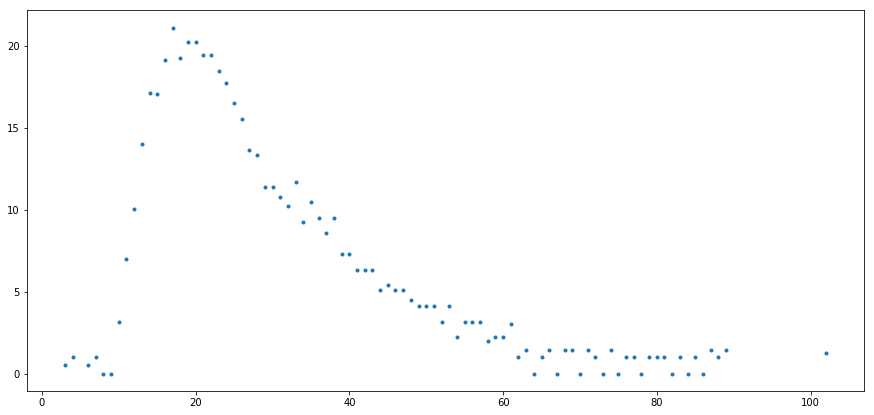

In [76]:
!mkdir frames
!git clone https://github.com/ImperatorMarsa/paper_boat_detection.git surse

cap = cv2.VideoCapture('surse/videos.mp4')

centres = []
count = 0

while(cap.isOpened()):
  success, frame = cap.read()
  if success == True:
    image, centr = paper_boat_detect(frame)
    centres.append(centr)
    for x in centres:
      if x[0] > 0:
        cv2.circle(image, x, 10, (0,255,0), -1)
    
    cv2.imwrite("frames/frame-%05d.jpg" % count, image)
    count += 1

  else:
    break
    
cap.release()

coord = False
times = False
spid = []
step = []
for X in range(len(centres)):
  x = centres[X]
  if x[0] > 0:
    if coord and times:
      lens = np.sqrt((x[0] - coord[0])**2 + (x[1] - coord[1])**2)
      if X - times > 0: # and lens /(X - times) > 0:
        spid.append(lens / (X - times))
        step.append(X)

      coord = x
      times = X
      
    else:
      coord = x
      times = X

width = 15
height = 7
fig1 = plt.figure(1, figsize=(width, height))
# x = np.linspace(maxwell.ppf(0.01), maxwell.ppf(0.99), 100)
x = np.linspace(0, 5, 100)
ax1 = fig1.gca()
ax1.plot(step, spid, '.')

plt.show()

In [77]:
!zip -r /content/file.zip /content/frames

from google.colab import files
files.download("/content/file.zip")
!rm -r frames
!rm -r surse
!rm file.zip

  adding: content/frames/ (stored 0%)
  adding: content/frames/frame-00046.jpg (deflated 1%)
  adding: content/frames/frame-00058.jpg (deflated 1%)
  adding: content/frames/frame-00042.jpg (deflated 1%)
  adding: content/frames/frame-00088.jpg (deflated 1%)
  adding: content/frames/frame-00128.jpg (deflated 1%)
  adding: content/frames/frame-00101.jpg (deflated 1%)
  adding: content/frames/frame-00007.jpg (deflated 1%)
  adding: content/frames/frame-00022.jpg (deflated 1%)
  adding: content/frames/frame-00095.jpg (deflated 1%)
  adding: content/frames/frame-00135.jpg (deflated 1%)
  adding: content/frames/frame-00038.jpg (deflated 1%)
  adding: content/frames/frame-00125.jpg (deflated 1%)
  adding: content/frames/frame-00034.jpg (deflated 1%)
  adding: content/frames/frame-00027.jpg (deflated 1%)
  adding: content/frames/frame-00014.jpg (deflated 1%)
  adding: content/frames/frame-00080.jpg (deflated 1%)
  adding: content/frames/frame-00102.jpg (deflated 1%)
  adding: content/frames/fr